In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import session_info 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import warnings 
%matplotlib inline

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Configurar visualización de dataframes
# pd.reset_option('^display.', silent=True) # reset_option('all')
pd.options.display.max_columns = None

np.random.seed(43)

# Imprimir información de la sesión
session_info.show()

In [2]:
df = pd.read_csv('USvideos_cc50_202101.csv')

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

In [5]:
#Total de registros por tipos de variables
df.dtypes.value_counts()

object     10
int64       5
bool        3
float64     2
Name: count, dtype: int64

In [6]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

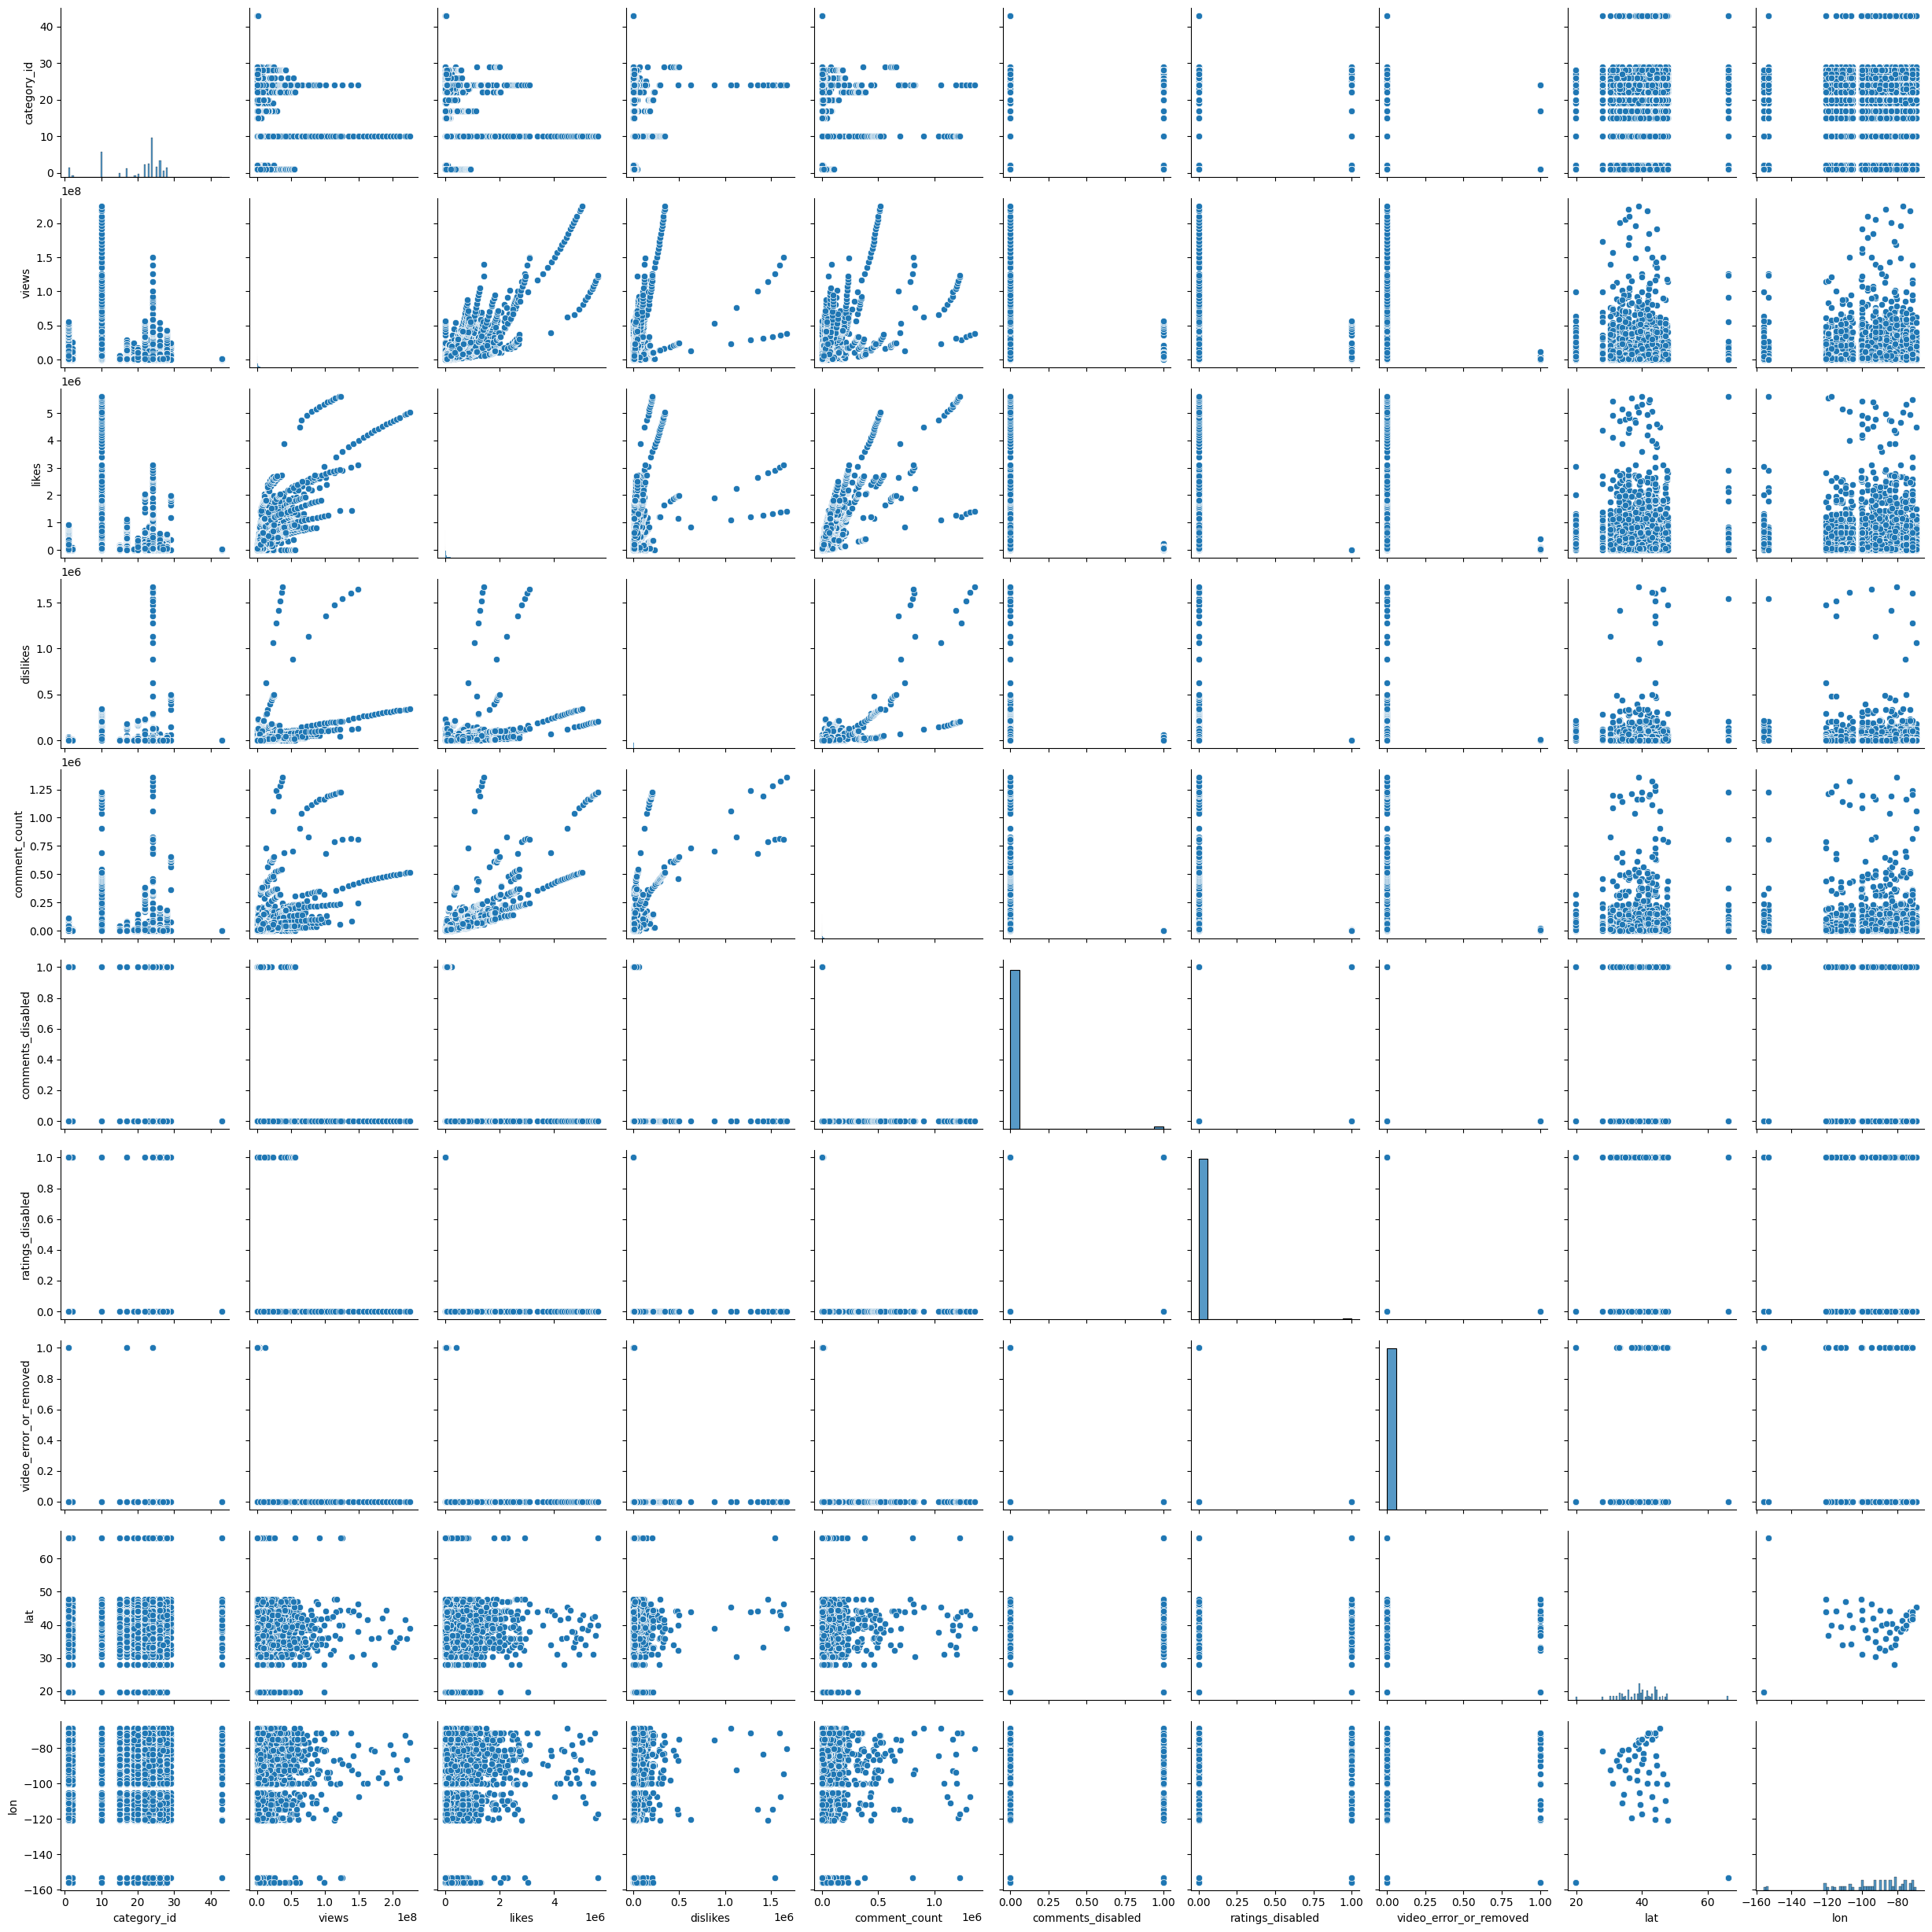

In [7]:
#creamos graficos simples para verificar los datos
sns.pairplot(df)

In [8]:
#leer columnas de varibles numericas
df.select_dtypes(np.number).columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'lat',
       'lon'],
      dtype='object')

In [9]:
#Describimos datos estadisticos de las variables numeriucas
df.describe(include=np.number)

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,39.660944,-93.741838
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,6.589701,19.034596
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,19.741755,-155.844437
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,35.860119,-105.358887
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,39.833851,-90.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,44.000000,-80.500000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,66.160507,-68.972168


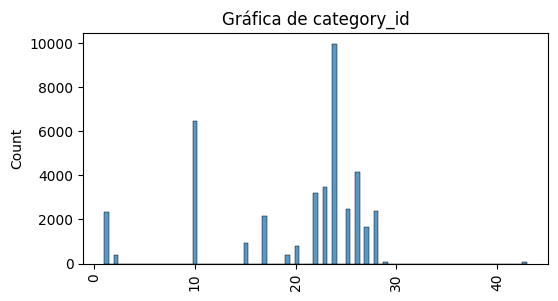

In [10]:
#Graficar destribucion de una varible numerica
plt.figure(figsize=(6, 3), dpi= 100)

sns.histplot(x='category_id', data=df).set(title=f'Gráfica de category_id', xlabel=None)
plt.xticks(rotation=90)

plt.show()

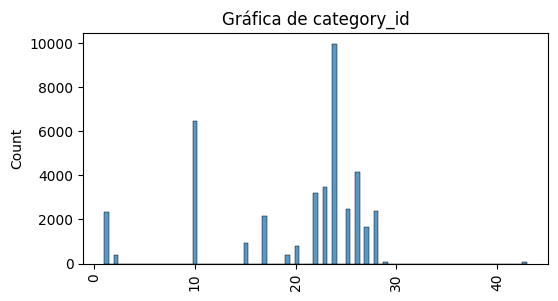

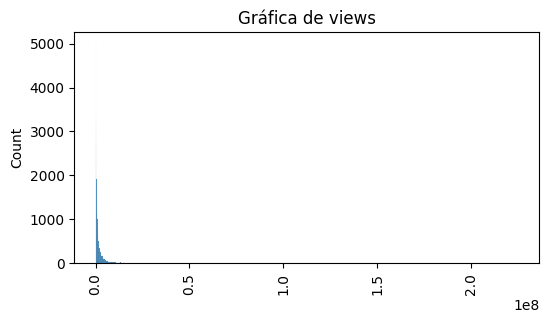

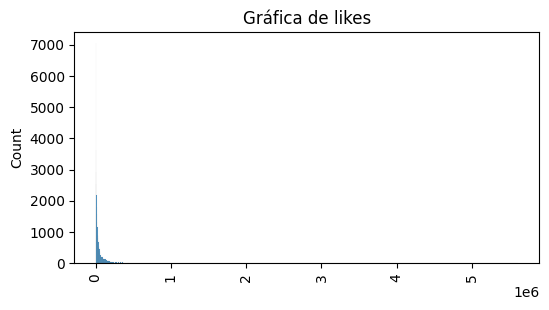

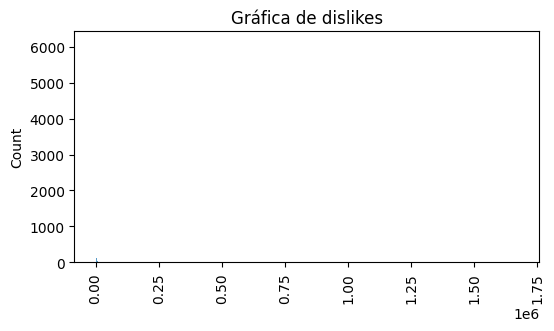

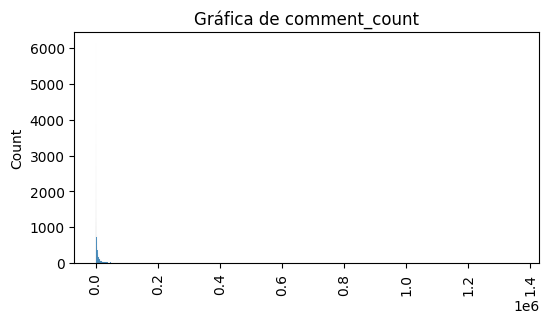

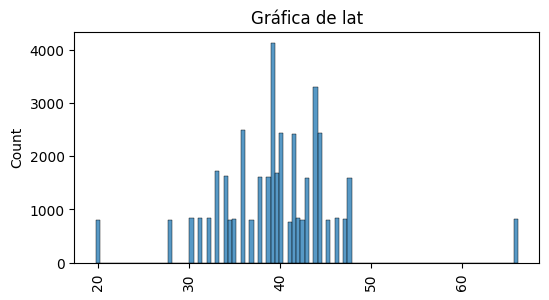

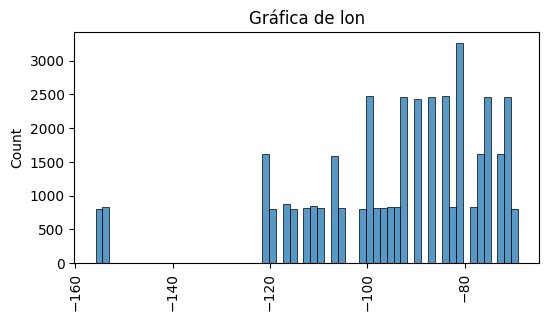

In [11]:
# Distribución para todas las varibles numericas 
for var_num in df.select_dtypes(np.number):  
    plt.figure(figsize=(6, 3), dpi= 100)
    sns.histplot(x=var_num, data=df).set(title=f'Gráfica de {var_num}', xlabel=None)
    plt.xticks(rotation=90)
    plt.show()

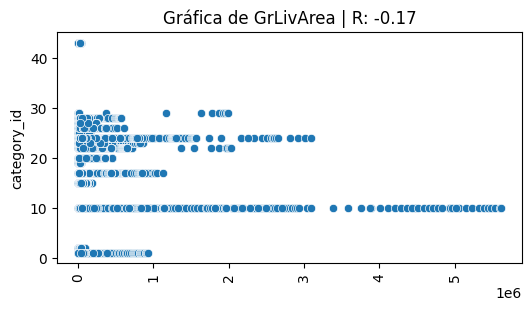

In [12]:
#Graficar una variable numerica contra una varible objetivo 
corr = df[['likes', 'category_id']].corr().loc['likes', 'category_id']
plt.figure(figsize=(6, 3), dpi= 100)
sns.scatterplot(x=df['likes'], y=df['category_id']).set(title=f'Gráfica de GrLivArea | R: {corr:.2}', xlabel=None)
plt.xticks(rotation=90)
plt.show()

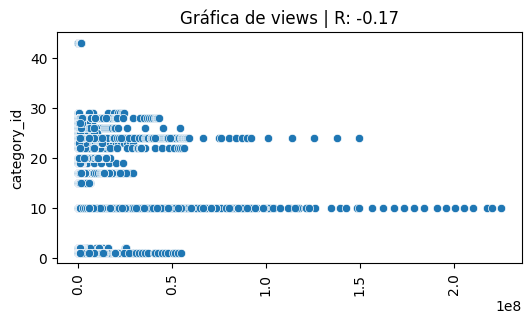

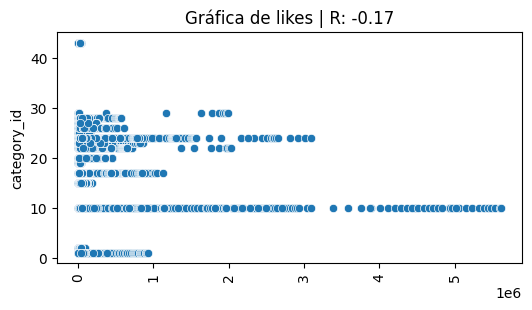

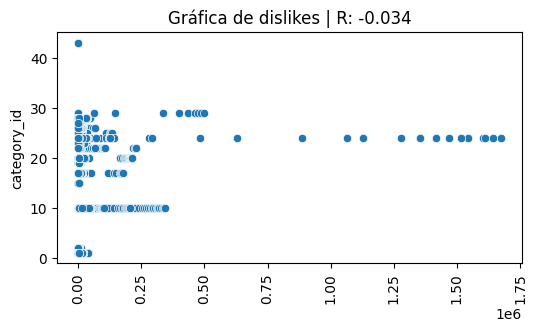

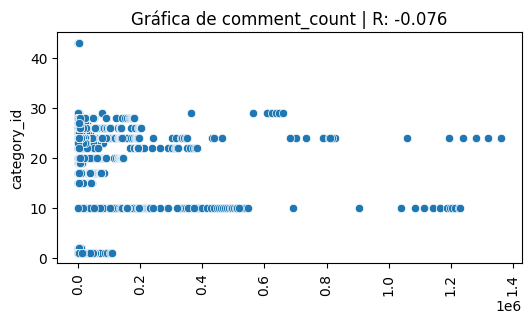

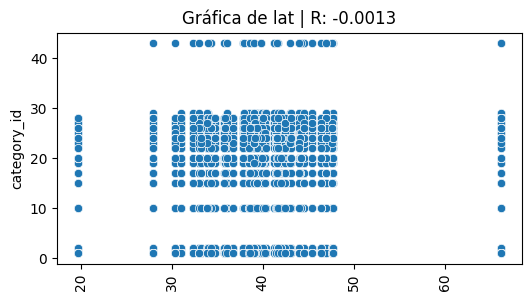

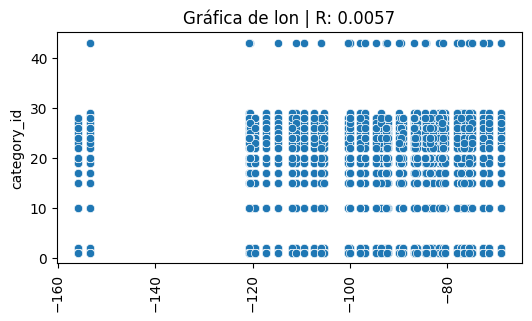

In [13]:
# Graficar variables numéricas contra la variable objetivo
for var_num in df.select_dtypes(np.number).columns: 
    target_var = 'category_id'
    corr = df[[var_num, target_var]].corr().loc[var_num, target_var]
    if var_num == target_var:
        continue
    try:
        plt.figure(figsize=(6, 3), dpi= 100)
        sns.scatterplot(x=df[var_num], y=df[target_var]).set(title=f'Gráfica de {var_num} | R: {corr:.2}', xlabel=None)
        plt.xticks(rotation=90)
        plt.show()
    except:
        print(f"Problems with column: {var_num}")
        pass

2. PARA LAS VARIABLES CATEGORICAS, SE VA LISTAR CADA UNA DE ELLAS Y SE VA DETERMINAR SU FRECUENCIA

In [14]:
# Variables categóricas
df.select_dtypes('object').columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'description', 'state', 'geometry'],
      dtype='object')

In [15]:
# Describir variables categóricas incluyendo frecuencia de categoría más común
df.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,state,geometry
count,40949,40949,40949,40949,40949,40949,40949,40379,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,50,50
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,North Carolina,POINT (-80.793457 35.782169)
freq,30,200,30,203,50,1535,30,58,888,888


In [16]:
# Lista de variables categóricas y sus categorías
df.select_dtypes('object').apply(lambda x: x.unique())

video_id          [2kyS6SvSYSE, 1ZAPwfrtAFY, 5qpjK5DgCt4, puqaWr...
trending_date     [17.14.11, 17.15.11, 17.16.11, 17.17.11, 17.18...
title             [WE WANT TO TALK ABOUT OUR MARRIAGE, The Trump...
channel_title     [CaseyNeistat, LastWeekTonight, Rudy Mancuso, ...
publish_time      [2017-11-13T17:13:01.000Z, 2017-11-13T07:30:00...
tags              [SHANtell martin, last week tonight trump pres...
thumbnail_link    [https://i.ytimg.com/vi/2kyS6SvSYSE/default.jp...
description       [SHANTELL'S CHANNEL - https://www.youtube.com/...
state             [Utah, Nevada, Delaware, Michigan, Florida, We...
geometry          [POINT (-111.950684 39.41922), POINT (-117.224...
dtype: object

In [17]:
# Lista de variables categóricas y frecuencia de sus categorías
df.select_dtypes('object').apply(lambda x: x.value_counts().to_dict())

video_id          {'j4KvrAUjn6c': 30, '8h--kFui1JA': 29, 'QBL8IR...
trending_date     {'17.14.11': 200, '18.16.04': 200, '18.01.04':...
title             {'WE MADE OUR MOM CRY...HER DREAM CAME TRUE!':...
channel_title     {'ESPN': 203, 'The Tonight Show Starring Jimmy...
publish_time      {'2018-05-18T14:00:04.000Z': 50, '2018-05-06T1...
tags              {'[none]': 1535, 'ABC|"americanidol"|"idol"|"a...
thumbnail_link    {'https://i.ytimg.com/vi/j4KvrAUjn6c/default.j...
description       {'► Listen LIVE: http://power1051fm.com/\n► Fa...
state             {'North Carolina': 888, 'Nevada': 874, 'Georgi...
geometry          {'POINT (-80.793457 35.782169)': 888, 'POINT (...
dtype: object

3. Analizamos los datos de la matriz de correlaciones de los datos de las varibles numemricas

In [18]:
# Matriz de correlación
corr = df.select_dtypes(include=np.number).corr()
corr

,category_id,views,likes,dislikes,comment_count,lat,lon
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,-0.001326,0.005743
views,-0.168231,1.000000,0.849177,0.472213,0.617621,-0.007908,0.000853
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.003861,0.002853
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,0.006940,-0.001792
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,0.003646,0.001306
lat,-0.001326,-0.007908,-0.003861,0.006940,0.003646,1.000000,-0.100978
lon,0.005743,0.000853,0.002853,-0.001792,0.001306,-0.100978,1.000000


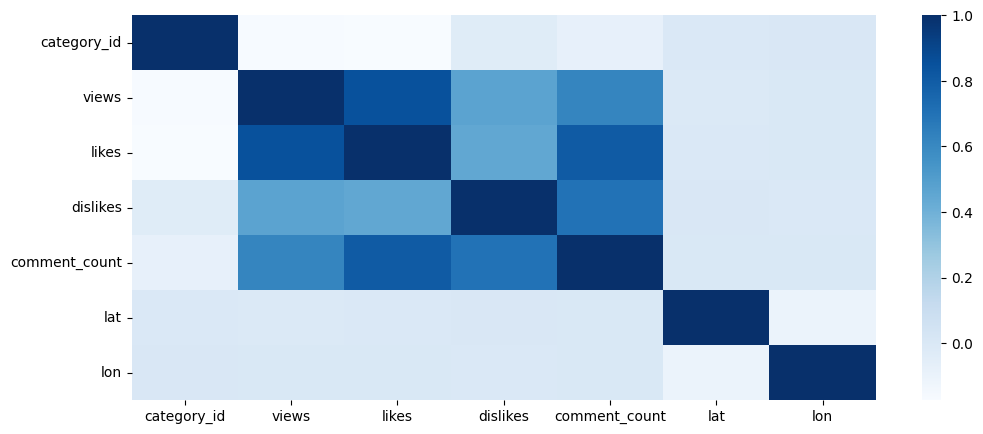

In [19]:
# Mapa de calor de matriz de correlación
plt.figure(figsize=(12, 5), dpi= 100)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Blues", 
        annot=False);

In [20]:
# Lista de pares de correlaciones (sin la diagonal)
corr_unique_pairs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
df_corr_pairs = pd.DataFrame(corr_unique_pairs, columns=['Corr'])
df_corr_pairs

Corr
views         likes          0.849177
likes         comment_count  0.803057
dislikes      comment_count  0.700184
views         comment_count  0.617621
              dislikes       0.472213
likes         dislikes       0.447186
dislikes      lat            0.006940
category_id   lon            0.005743
comment_count lat            0.003646
likes         lon            0.002853
comment_count lon            0.001306
views         lon            0.000853
category_id   lat           -0.001326
dislikes      lon           -0.001792
likes         lat           -0.003861
views         lat           -0.007908
category_id   dislikes      -0.033547
              comment_count -0.076307
lat           lon           -0.100978
category_id   views         -0.168231
              likes         -0.173921

In [21]:
# Correlación arriba de 0.70
threshold = 0.70
mask = df_corr_pairs['Corr'].abs() > threshold
df_high_corr = df_corr_pairs[mask]
df_high_corr

,,Corr
views,likes,0.849177
likes,comment_count,0.803057
dislikes,comment_count,0.700184


In [22]:
# Correlaciones con variable objetivo 'SalePrice'
df_corr_sales = corr.loc['category_id'].sort_values(ascending=False).drop(index='category_id')
df_corr_sales

lon              0.005743
lat             -0.001326
dislikes        -0.033547
comment_count   -0.076307
views           -0.168231
likes           -0.173921
Name: category_id, dtype: float64

In [23]:
df_high_corr

,,Corr
views,likes,0.849177
likes,comment_count,0.803057
dislikes,comment_count,0.700184


In [24]:
df_corr_sales.index

Index(['lon', 'lat', 'dislikes', 'comment_count', 'views', 'likes'], dtype='object')

4. PREPARACION DE LOS DATOS

video_id 0
trending_date 0
title 0
channel_title 0
category_id 0
publish_time 0
tags 0
views 0
likes 0
dislikes 0
comment_count 0
thumbnail_link 0
comments_disabled 0
ratings_disabled 0
video_error_or_removed 0
description 570
state 0
lat 0
lon 0
geometry 0


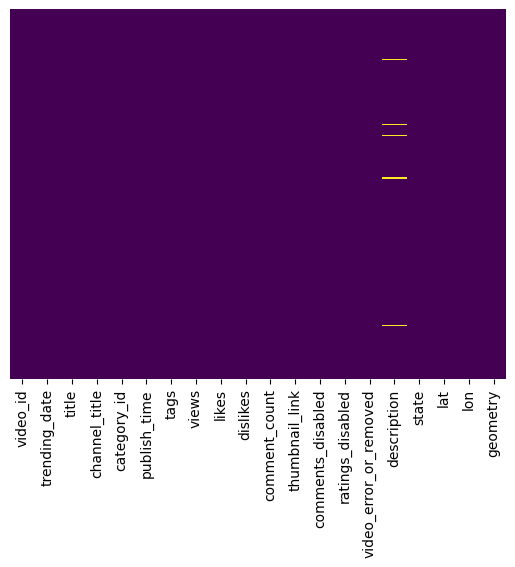

In [25]:
#Identificar los valores nulos mediante un mapa de calor
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#ver la cantidad de valores nulos 
for col in df.columns:
    print(col, np.sum(df[col].isnull()))

<Axes: >

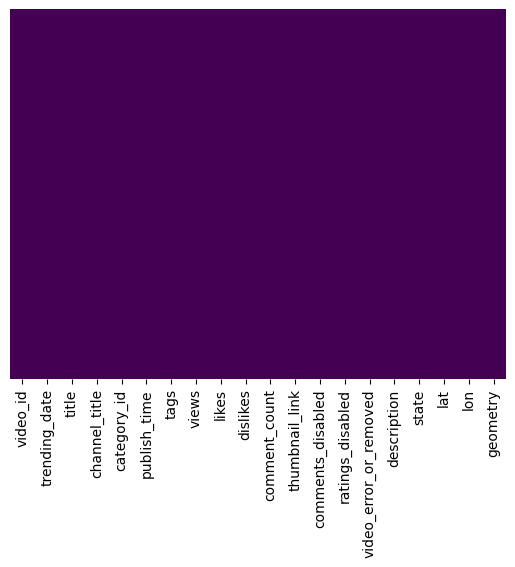

In [26]:
#reemplazamos los valores nulos 
df['description'].fillna(value='No description available.', inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

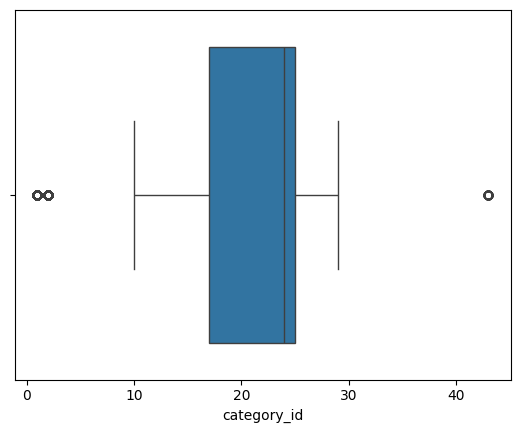

In [27]:
#identificacion de los outliers de las columnas que consideremos que puedan necesitarlo
boxplot = sns.boxplot(data=df, x=df['category_id'])

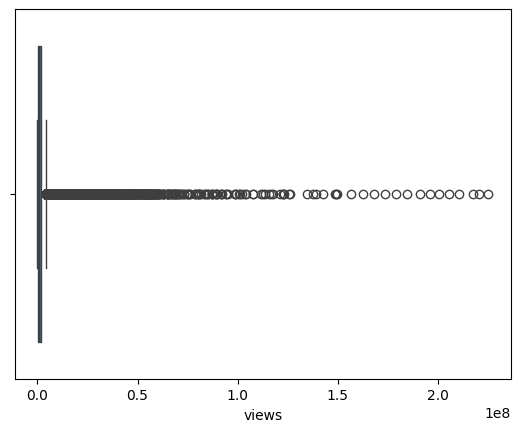

In [28]:
boxplot = sns.boxplot(data=df, x=df['views'])

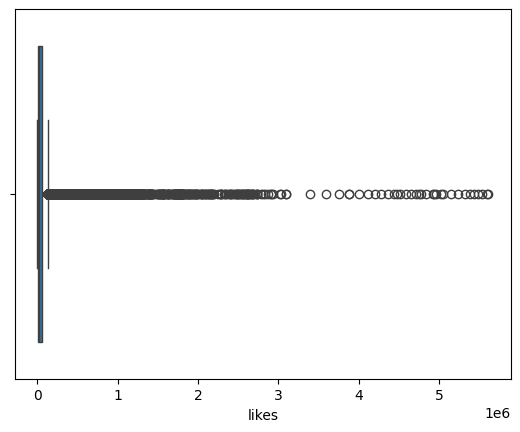

In [29]:
boxplot = sns.boxplot(data=df, x=df['likes'])

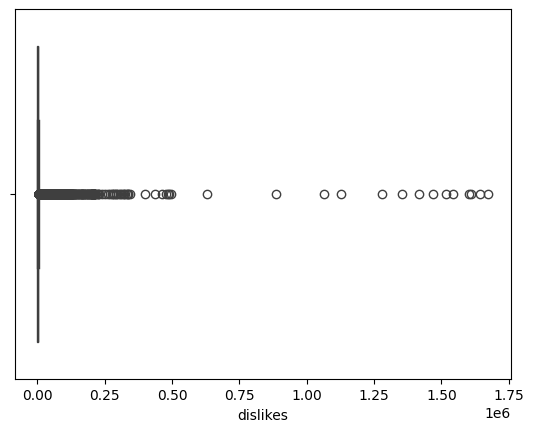

In [30]:
boxplot = sns.boxplot(data=df, x=df['dislikes'])

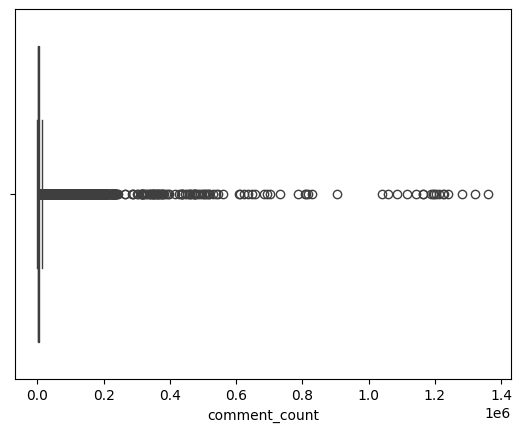

In [31]:
boxplot = sns.boxplot(data=df, x=df['comment_count'])

In [32]:
# reescalamos las columnas con outliers con el metodo de decimal sclaing que sirve para preservar el orden de la magnitud de los valores originales
# creamos nuevas columnas para no perder los datos originales

df['views_reescaled'] = df['views'] / (10 ** np.ceil(np.log10(df['views'].max())))
df['likes_reescaled'] = df['likes'] / (10 ** np.ceil(np.log10(df['likes'].max())))
df['dislikes_reescaled'] = df['dislikes'] / (10 ** np.ceil(np.log10(df['dislikes'].max())))
df['comment_count_reescaled'] = df['comment_count'] / (10 ** np.ceil(np.log10(df['comment_count'].max())))


In [33]:
# añadimos las categorias de los videos en una nueva columna
with open('US_category_id.json') as f:
    data = json.load(f)
    
category_ids = []
titles = []

for item in data['items']:
    category_ids.append(int(item['id']))
    titles.append(item['snippet']['title'])
    
category_titles = pd.DataFrame({'category_id': category_ids, 'category_title': titles})

In [34]:
# exportar el csv limpio
df.to_csv('dataframe_limpio.csv')

Pregunta 1

In [35]:
# Agrupar por 'category_id' y calcular métricas agregadas
tendencias_por_categoria = df.groupby('category_id').agg({
    'video_id': 'count',  # Contar la cantidad de videos en cada categoría
    'views': 'mean',      # Calcular el promedio de vistas por categoría
    'likes': 'mean',      # Calcular el promedio de likes por categoría
}).reset_index()

# Renombrar columnas para mayor claridad
tendencias_por_categoria = tendencias_por_categoria.rename(columns={
    'video_id': 'total_videos',
    'views': 'promedio_vistas',
    'likes': 'promedio_likes',
})

# Ordenar por la cantidad total de tendencias de mayor a menor
tendencias_por_categoria = tendencias_por_categoria.sort_values(by='total_videos', ascending=False)

# Imprimir o mostrar el análisis completo
print(tendencias_por_categoria)

    category_id  total_videos  promedio_vistas  promedio_likes
9            24          9964     2.067883e+06    53243.325070
2            10          6472     6.201003e+06   218918.199011
11           26          4146     9.837301e+05    39286.076942
8            23          3457     1.480308e+06    62582.223315
7            22          3210     1.531835e+06    58135.825234
10           25          2487     5.925877e+05     7298.364696
13           28          2401     1.452627e+06    34374.276551
0             1          2345     3.106250e+06    70787.836247
4            17          2174     2.025969e+06    45363.942502
12           27          1656     7.129408e+05    29745.031401
3            15           920     8.311435e+05    21055.110870
6            20           817     2.620831e+06    84502.183599
5            19           402     8.546196e+05    12030.462687
1             2           384     1.355965e+06    11056.395833
14           29            57     2.963884e+06   259923

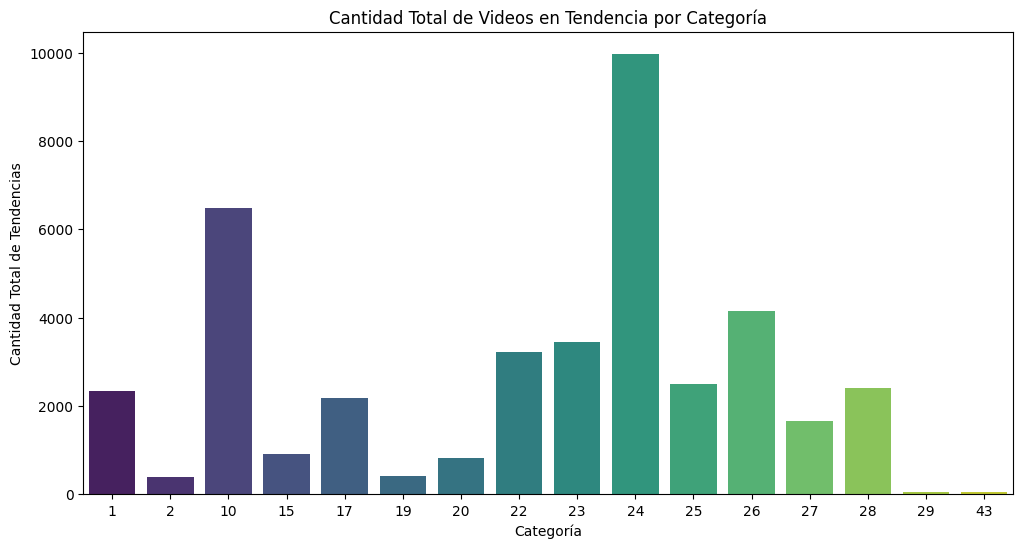

In [36]:
# Agrupar por 'category_id' y calcular la cantidad total de tendencias
tendencias_por_categoria = df.groupby('category_id')['video_id'].count().reset_index()

# Renombrar la columna para mayor claridad
tendencias_por_categoria = tendencias_por_categoria.rename(columns={'video_id': 'total_tendencias'})

# Ordenar por la cantidad total de tendencias de mayor a menor
tendencias_por_categoria = tendencias_por_categoria.sort_values(by='total_tendencias', ascending=False)

# Crear el gráfico de barras con los ejes intercambiados
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='total_tendencias', data=tendencias_por_categoria, palette='viridis')
plt.title('Cantidad Total de Videos en Tendencia por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Total de Tendencias')
plt.show()

Pregunta 2

[Text(0.5, 1.0, 'Likes por categoría'),
 Text(0.5, 0, 'Categoría'),
 Text(0, 0.5, 'Likes')]

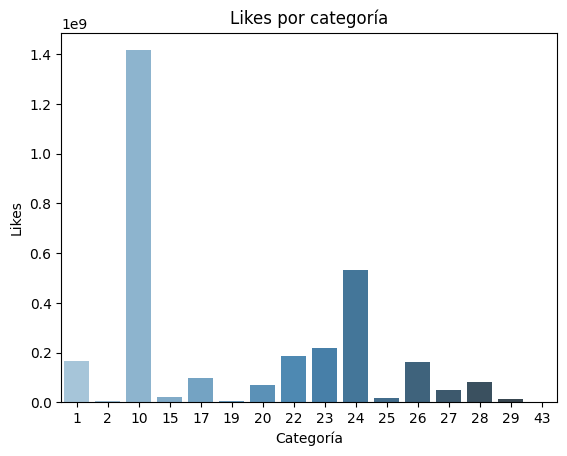

In [37]:
# ¿Qué categorías de videos son los que más gustan? ¿Y las que menos  gustan?
like_por_categoria = df[['category_id', 'likes']].groupby('category_id').sum()
plot = sns.barplot(x='category_id', y='likes', data=like_por_categoria, errorbar=None, palette='Blues_d') 
plot.set(title='Likes por categoría', xlabel='Categoría', ylabel='Likes')

In [38]:
like_por_categoria.groupby('category_id').sum().sort_values(by='category_id', ascending=False)

,likes
category_id,
43,1082639
29,14815646
28,82532638
27,49257772
26,162880075
25,18151033
24,530516491
23,216346746
22,186615999


[Text(0.5, 1.0, 'Dislikes por categoría'),
 Text(0.5, 0, 'Categoría'),
 Text(0, 0.5, 'Dislikes')]

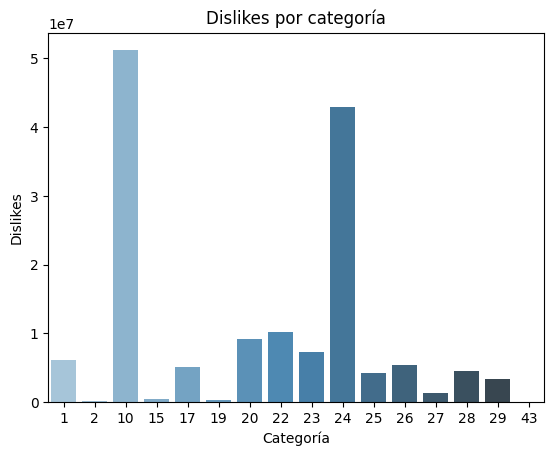

In [39]:
dislikes_por_categoria = df[['category_id', 'dislikes']].groupby('category_id').sum()
plot = sns.barplot(x='category_id', y='dislikes', data=dislikes_por_categoria, errorbar=None, palette='Blues_d')
plot.set(title='Dislikes por categoría', xlabel='Categoría', ylabel='Dislikes')

In [40]:
dislikes_por_categoria.groupby('category_id').sum().sort_values(by='category_id', ascending=False)

,dislikes
category_id,
43,24508
29,3310381
28,4548402
27,1351972
26,5473899
25,4180049
24,42987663
23,7230391
22,10187901


Pregunta 3

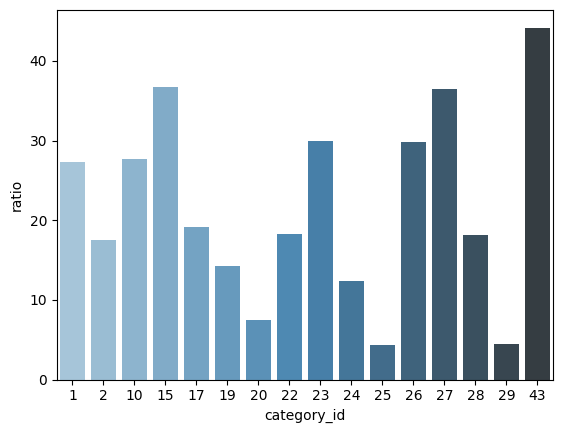

In [41]:
ratio_vistas_comentarios = df[['category_id', 'likes', 'dislikes']].groupby('category_id').sum()
ratio_vistas_comentarios['ratio'] = ratio_vistas_comentarios['likes'] / ratio_vistas_comentarios['dislikes']
plot = sns.barplot(x='category_id', y='ratio', data=ratio_vistas_comentarios, errorbar=None, palette='Blues_d')

In [42]:
ratio_vistas_comentarios.groupby('category_id').sum().sort_values(by='category_id', ascending=False)

,likes,dislikes,ratio
category_id,,,
43,1082639,24508,44.174922
29,14815646,3310381,4.475511
28,82532638,4548402,18.145414
27,49257772,1351972,36.434018
26,162880075,5473899,29.755769
25,18151033,4180049,4.342301
24,530516491,42987663,12.341134
23,216346746,7230391,29.921860
22,186615999,10187901,18.317414


Pregunta 4

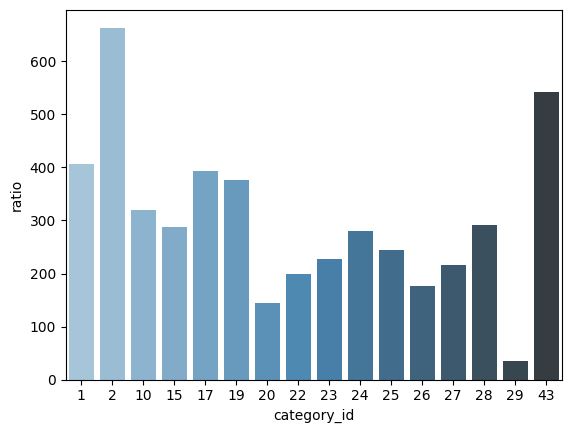

In [43]:
# ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

ratio_vistas_comentarios = df[['category_id', 'views', 'comment_count']].groupby('category_id').sum()
ratio_vistas_comentarios['ratio'] = ratio_vistas_comentarios['views'] / ratio_vistas_comentarios['comment_count']
plot = sns.barplot(x='category_id', y='ratio', data=ratio_vistas_comentarios, errorbar=None, palette='Blues_d')

In [44]:
ratio_vistas_comentarios.groupby('category_id').sum().sort_values(by='category_id', ascending=False)

,views,comment_count,ratio
category_id,,,
43,51501058,95117,541.449562
29,168941392,4808797,35.131737
28,3487756816,11989926,290.890604
27,1180629990,5442242,216.938164
26,4078545064,23149550,176.182477
25,1473765704,6039433,244.023852
24,20604388195,73566498,280.078416
23,5117426208,22545582,226.981331
22,4917191726,24778032,198.449648
